**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [1]:
'''Packages'''
import re
import codecs
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords
import numpy as np
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from heapq import nlargest
from operator import itemgetter
from collections import Counter
from nltk import tokenize
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
import spacy
from bs4 import BeautifulSoup
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pablo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Data processing

In [17]:
data = pd.read_csv("D:\\Documents\\ITMO\\Year1\\NLP\\Hw1\\web_sites_data.csv")

In [18]:
for i in range(len(data)):
    data['text'][i] = ' '.join(BeautifulSoup(data['text'][i], "html.parser").stripped_strings).lower()


In [246]:
#data.to_csv('clean_small.csv')
#data = pd.read_csv('clean_small.csv')

In [19]:
#remove all except words
for i in range(len(data)):
    data['text'][i] = re.sub('([^A-Za-z0-9 ]|[^ ]*[0-9][^ ]*)', ' ', data['text'][i])

In [20]:
#tokenizer
array_for_tokens = []
for i in range(len(data)):
    array_for_tokens.append(TreebankWordTokenizer().tokenize(data["text"][i]))


data['tokens'] = array_for_tokens

#stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


clean = []
stop_my_words = ['com','u', 'inc', 'msn','xx','e','v','d','r',' r', 'r ', ' r ' ]
for i in range(len(data)):
    #deleting stopwords
    tokens_ns = [token for token in data["tokens"][i] if token not in stop_words]
    tokens_ns2 = [token for token in tokens_ns if token not in stop_my_words]
    #lemmatization
    temp = []
    for token in tokens_ns2:
        word = lemmatizer.lemmatize(token)
        if word not in stop_my_words:
            temp.append(word)
    clean.append(temp)


data['tokens_ns'] = clean

data.head()

,text,tokens,tokens_ns
0,eric newby love and war in the apennines eri...,"[eric, newby, love, and, war, in, the, apennin...","[eric, newby, love, war, apennines, eric, newb..."
1,eric newby short walk in the hindu kush eric...,"[eric, newby, short, walk, in, the, hindu, kus...","[eric, newby, short, walk, hindu, kush, eric, ..."
2,william wordsworth the poetry of wordsworth ...,"[william, wordsworth, the, poetry, of, wordswo...","[william, wordsworth, poetry, wordsworth, unab..."
3,harriet beecher stowe uncle tom s cabin harr...,"[harriet, beecher, stowe, uncle, tom, s, cabin...","[harriet, beecher, stowe, uncle, tom, cabin, h..."
4,elizabeth buchan consider the lily elizabeth...,"[elizabeth, buchan, consider, the, lily, eliza...","[elizabeth, buchan, consider, lily, elizabeth,..."


In [21]:
len(data)

71699

In [4]:
#data.to_csv('clean.csv')
#data = pd.read_csv('clean.csv')

In [22]:
type(data['tokens_ns'][0])

list

In [23]:
#create full-tokens list by joining chapters
flat_list = [item for sublist in data['tokens_ns'] for item in sublist]


In [24]:
tokens =  Counter(flat_list)


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [25]:
tokens_count_df =  pd.DataFrame.from_dict(tokens, orient='index').reset_index()
tokens_count_df.columns = ['word','count']


In [26]:
tokens_count_df = tokens_count_df.sort_values(by=['count'],ascending=False)

In [27]:
import plotly.express as px
fig = px.bar(tokens_count_df[0:100], x='word', y='count',title="Words distribution")
fig.show()

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [28]:
#firstly collect cleaned tokens in text
full_text_clean = []
#create full cleaned text by joining chapters
for i in range(len(data)):
    full_text_clean.append(' '.join(data['tokens_ns'][i]))
data["full_text_clean"] = full_text_clean

In [29]:
print(data['full_text_clean'][1000])

barnes noble whale dolphin seal harpercollins publishing zondervan paperback skip main content sign account account setting wish list order status nook store event help election read decide holiday preview see season best book save tony bennett new viva duet certified pre owned nook device starting search product book nook store nook book textbook movie tv music kid book marketplace rare book newsstand calendar home gift toy game search million product shopping bag item spend get free shipping book nook book nook textbook newsstand teen kid toy game home gift dvd music gift card close whale dolphin seal harpercollins publishing add list add list b n library favorite wish list reading new essential list create new essential list please enter list name entered invalid character please enter valid alpha numeric character please name essential list new essential list may add description list submit cancel new wish list create new wish list please enter list name entered invalid character p

In [49]:
print(data['full_text_clean'][50001])

osci stock quote oscient pharmaceutical corp money home mail sign auto money sport tech hotmail messenger download airfare travel auto career job city guide dating personal food entertaining game health fitness horoscope lifestyle map direction money movie music news real estate rental shopping sport tech gadget tv weather white page wonderwall yellow page directory money live search help home news investing personal finance tax community money small business new money investing home portfolio market stock fund etf commentary broker name symbol dow nasdaq p market closed osci quote quote real time quote option snapshot chart historical real time intraday news info recent news key development message board fundamental company report sec filing earnings estimate financial result insider trading ownership research advisor fyi cap stockscouter analyst rating guided research research wizard expert pick find stock stock screener stock power search top rated stock site map related link mail a

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [31]:
from datasketch import MinHash, MinHashLSH
from nltk import ngrams



In [32]:
def duplicates_number_detection(perm=128, n_gr = 2):
  lsh = MinHashLSH(threshold=0.4, num_perm=perm)

  # Create MinHash objects
  minhashes = {}
  for c, i in enumerate(data['tokens_ns']):
    minhash = MinHash(num_perm=perm)
    #print(i)
    for d in ngrams(i, n_gr):
      #print(d)
      minhash.update("".join(d).encode('utf-8'))
    lsh.insert(c, minhash)
    minhashes[c] = minhash


  dupl_pairs = 0
  for i in range(len(minhashes.keys())):
    result = lsh.query(minhashes[i])
    dupl_pairs += len(result) -1
  return dupl_pairs/2

In [34]:
per_list = []
ngr_list = []
duplicates_list = []
for i in [40,60,80,100,128]:
    print(i)
    per_list.append(i)
    duplicates_list.append(duplicates_number_detection(i,3))

40
60
80
100
128


In [35]:
duplicates_df = pd.DataFrame()
duplicates_df['permutations'] = per_list
duplicates_df['duplicates'] = list(map(int, duplicates_list))

In [36]:
duplicates_df

,permutations,duplicates
0,40,88415439
1,60,90616458
2,80,78918778
3,100,84370370
4,128,88459291


In [39]:
import matplotlib.pyplot as plt

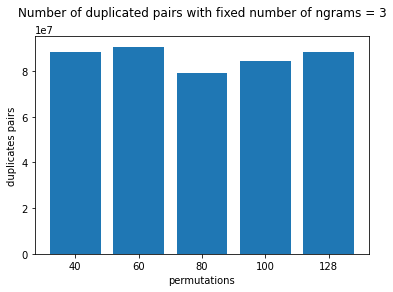

In [47]:
plt.bar([str(x) for x in duplicates_df['permutations']],duplicates_df['duplicates'])
plt.xlabel('permutations')
plt.ylabel('duplicates pairs')
plt.title('Number of duplicated pairs with fixed number of ngrams = 3',pad=20)
plt.show()

In [42]:
ngr_list = []
duplicates_list = []
for i in [1,2,3,4,5]:
    print(i)
    ngr_list.append(i)
    duplicates_list.append(duplicates_number_detection(128,i))

1
2
3
4
5


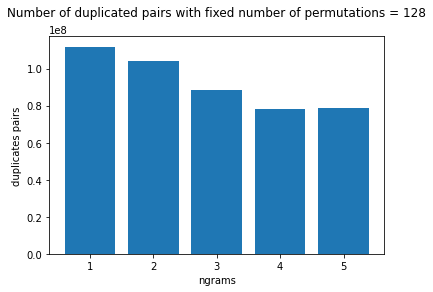

In [45]:
plt.bar([str(x) for x in ngr_list],duplicates_list)
plt.xlabel('ngrams')
plt.ylabel('duplicates pairs')
plt.title('Number of duplicated pairs with fixed number of permutations = 128',pad=20)
plt.show()

# [Optional 10 points] Part 3. Topic model

#IN SECOND FILE